In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread

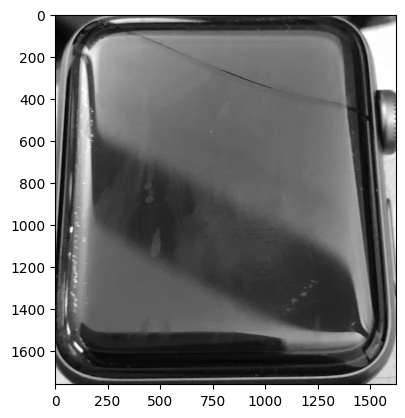

In [2]:
img = imread('rzthd3rhcnh31.jpg')
img = img[:,:,0]
plt.imshow(img, cmap = 'gray')

In [3]:
img.shape

(1759, 1622)

In [4]:
img

array([[ 49,  48,  48, ..., 146, 146, 146],
       [ 48,  47,  46, ..., 146, 145, 145],
       [ 48,  46,  44, ..., 144, 144, 144],
       ...,
       [226, 227, 229, ..., 207, 204, 202],
       [227, 228, 229, ..., 208, 205, 203],
       [227, 227, 228, ..., 208, 205, 204]], dtype=uint8)

In [5]:
img.max() # white

255

In [6]:
img.min() # black

0

In [7]:
# img = np.pad(img, 0)

In [8]:
mask_width = 3

In [9]:
img = np.pad(img, pad_width = (1, 1))
original_img = np.copy(img)
img

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,  49,  48, ..., 146, 146,   0],
       [  0,  48,  47, ..., 145, 145,   0],
       ...,
       [  0, 227, 228, ..., 205, 203,   0],
       [  0, 227, 227, ..., 205, 204,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [10]:
img[0:mask_width, 0:mask_width]

array([[ 0,  0,  0],
       [ 0, 49, 48],
       [ 0, 48, 47]], dtype=uint8)

In [11]:
lpf = np.ones((mask_width, mask_width))*(1/(mask_width**2)) 
lpf

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [12]:
# convolution of pixels and mask --- working 
np.sum(img[0:mask_width, 0:mask_width]*lpf) #---new value at selected centre

21.333333333333332

In [13]:
for row in range(1,img.shape[0]-1):
  for col in range(1,img.shape[1]-1):
    img[row][col] =(np.sum(img[row-1][col-1]*lpf[0,0] + img[row-1,col]*lpf[0,1]+img[row-1,col+1]*lpf[0,2]
                   +img[row,col-1]*lpf[1,0]+img[row,col]*lpf[1,1]+img[row,col+1]*lpf[1,2]
                   +img[row+1,col-1]*lpf[2,0]+img[row+1,col]*lpf[2,1]+img[row+1,col+1]*lpf[2,2])) 
    # print(img[row][col])

In [14]:
# add 5x5 and 7x7 masks for above manual implementation

In [15]:
img

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,  21,  28, ...,  91,  58,   0],
       [  0,  26,  37, ..., 120,  78,   0],
       ...,
       [  0, 139, 204, ..., 194, 124,   0],
       [  0,  88, 123, ..., 117,  71,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

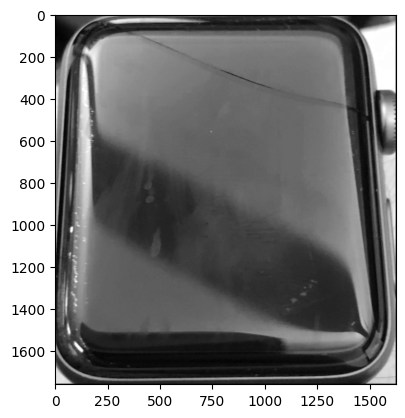

In [16]:
plt.imshow(img,cmap='gray')

Text(0.5, 1.0, 'Low Pass Filtered Image')

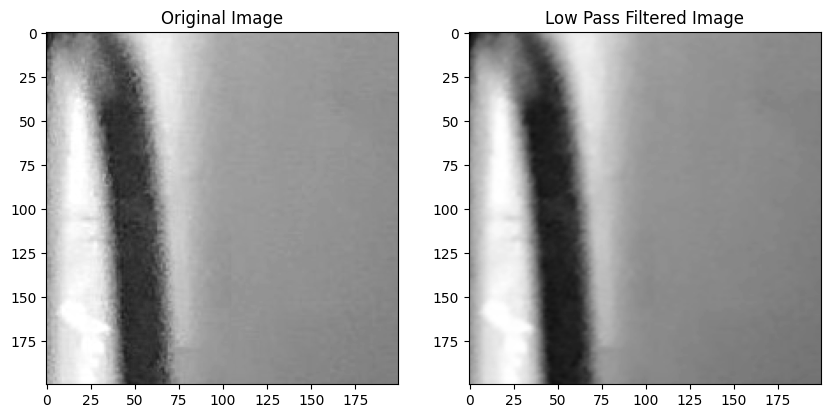

In [17]:
fig, ax = plt.subplots(figsize=(10,6),nrows=1,ncols=2)
ax[0].imshow(original_img[200:400,120:320],cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(img[200:400,120:320],cmap='gray')
ax[1].set_title('Low Pass Filtered Image')

In [18]:
# Sobel
# img = np.copy(original_img)
edges_x = edges_y = np.copy(original_img)

In [19]:
sobel_kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

In [20]:
for row in range(1,img.shape[0]-1):
  for col in range(1,img.shape[1]-1): #convolution
    edges_x[row][col] = (np.sum(img[row-1][col-1]*sobel_kernel_x[0,0] + img[row-1,col]*sobel_kernel_x[0,1]+img[row-1,col+1]*sobel_kernel_x[0,2]
                   +img[row,col-1]*sobel_kernel_x[1,0]+img[row,col]*sobel_kernel_x[1,1]+img[row,col+1]*sobel_kernel_x[1,2]
                   +img[row+1,col-1]*sobel_kernel_x[2,0]+img[row+1,col]*sobel_kernel_x[2,1]+img[row+1,col+1]*sobel_kernel_x[2,2])) 
    edges_y[row][col] = (np.sum(img[row-1][col-1]*sobel_kernel_y[0,0] + img[row-1,col]*sobel_kernel_y[0,1]+img[row-1,col+1]*sobel_kernel_y[0,2]
                   +img[row,col-1]*sobel_kernel_y[1,0]+img[row,col]*sobel_kernel_y[1,1]+img[row,col+1]*sobel_kernel_y[1,2]
                   +img[row+1,col-1]*sobel_kernel_y[2,0]+img[row+1,col]*sobel_kernel_y[2,1]+img[row+1,col+1]*sobel_kernel_y[2,2])) 

Text(0.5, 1.0, 'Edges Y')

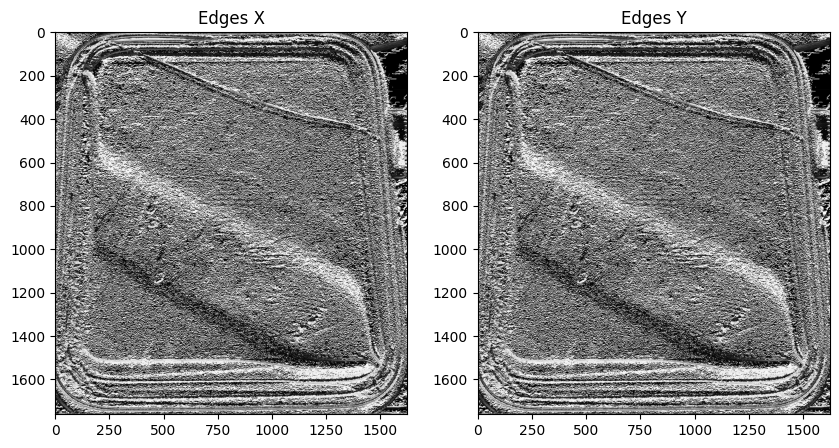

In [21]:
fig, ax = plt.subplots(figsize=(10,6),nrows=1,ncols=2)
ax[0].imshow(edges_x,cmap='gray',vmax=255,vmin=0)
ax[0].set_title('Edges X')
ax[1].imshow(edges_y,cmap='gray',vmax=255,vmin=0)
ax[1].set_title('Edges Y')

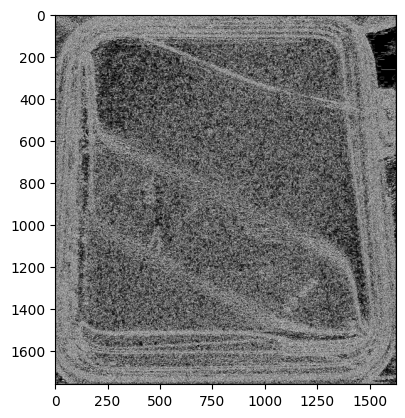

In [22]:
gradient = np.sqrt((np.power(edges_x,2) + np.power(edges_y,2)))
plt.imshow(gradient,cmap='gray')

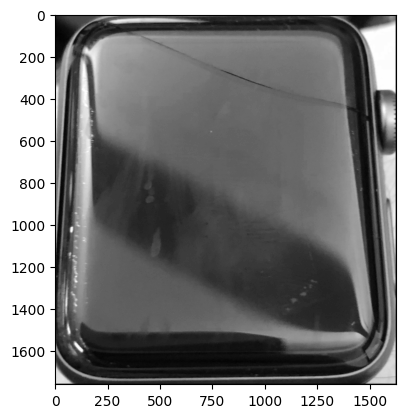

In [23]:
import cv2
# Setting All parameters
t_lower = 100  # Lower Threshold
t_upper = 200  # Upper threshold
aperture_size = 5 
  
# Applying the Canny Edge filter
# with Custom Aperture Size
edge = cv2.Canny(img, t_lower, t_upper, 
                 apertureSize=aperture_size)
plt.imshow(img,cmap='gray',vmax=255,vmin=0)

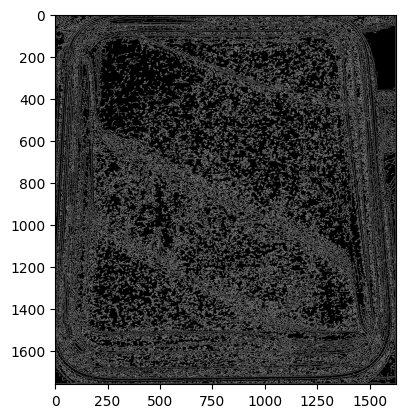

In [24]:
plt.imshow(edge,cmap='gray',vmax=255,vmin=0)